# Loading & Preprocessing

In [1]:
# Load packages we need
import sys
import os
import time

import numpy as np
import pandas as pd
import sklearn
#import seaborn as sns

#from matplotlib import pyplot as plt
#plt.rcParams.update({'font.size': 16})

print('------------')
print('### Python version: ' + __import__('sys').version)
print('### NumPy version: ' + np.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('------------')

def var_exists(var_name):
    return (var_name in globals() or var_name in locals())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
------------
### Python version: 3.9.18 (main, Sep 11 2023, 08:20:50) 
[Clang 14.0.6 ]
### NumPy version: 1.23.5
### Scikit-learn version: 1.2.2
------------


In [2]:
# Set the seed
seed = 42
np.random.seed(seed)

In [3]:
# load diabetes dataset
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

df.info()

# the target is Diabetes_012: 0 = no diabetes, 1 = pre-diabetes, 2 = diabetes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# check if any null values present
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
# Split the data into features (X) and the target variable (y)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

print(X.shape)
print(y.shape)

(253680, 21)
(253680,)


## a) Feature scaling & train-test-val split

In [7]:
# Scale features using min-max scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [8]:
# Split the data into train-validation-test sets: 90-0.05-0.05
train_x, temp_x, train_y, temp_y = train_test_split(scaled_X, y, test_size=0.1, random_state=seed)
val_x, test_x, val_y, test_y = train_test_split(temp_x, temp_y, test_size=0.5, random_state=seed)

In [9]:
print(df.shape)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

(253680, 22)
(228312, 21)
(12684, 21)
(12684, 21)


In [10]:
# see distribution of target variable (class imbalances)
class_distribution = np.bincount(train_y)

# Calculate the percentage of each class in the training set
class_percentages = class_distribution / class_distribution.sum() * 100
print(class_percentages) # Clearly the data is imbalanced

[84.22772347  1.82119205 13.95108448]


In [11]:
# visualize train data class distributions 
target_col = df.columns[0]
df_excluded = df.drop(columns=[target_col])
train_df = pd.DataFrame(train_x, columns=df_excluded.columns)
train_df['Diabetes_012'] = train_y 

sns.countplot(x='Diabetes_012', data=train_df)
plt.xlabel('No Diabetes, pre-diabetes, or diabetes')
plt.ylabel('Count')
plt.title('Distribution of target variable')

legend_labels = ['No Diabetes', 'Pre-diabetes', 'Diabetes']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette()[:3]]  
plt.legend(legend_handles, legend_labels)

plt.show()

NameError: name 'sns' is not defined

## b) Data imbalance techniques

In [12]:
from sklearn.utils import resample
from sklearn.utils import class_weight

# # #1: Upsampling (Over-sampling)
# Separate majority and minority classes
majority_class = train_df[train_df['Diabetes_012'] == 0]
minority_class1 = train_df[train_df['Diabetes_012'] == 1]
minority_class2 = train_df[train_df['Diabetes_012'] == 2]

# Upsample minority class
minority_upsampled1 = resample(minority_class1, 
                               replace=True,     # sample with replacement
                               n_samples=len(majority_class),    # to match majority class
                               random_state=42)

minority_upsampled2 = resample(minority_class2, 
                               replace=True,     # sample with replacement
                               n_samples=len(majority_class),    # to match majority class
                               random_state=42)

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority_class, minority_upsampled1, minority_upsampled2])

# Shuffle the upsampled DataFrame to ensure randomness
upsampled = upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

target_distribution = upsampled['Diabetes_012'].value_counts()
print(target_distribution)

Diabetes_012
1.0    173199
0.0    173199
2.0    173199
Name: count, dtype: int64


In [13]:
# # #2: Downsampling (Under-sampling)
majority_class = train_df[train_df['Diabetes_012'] == 0]
minority_class1 = train_df[train_df['Diabetes_012'] == 1]
minority_class2 = train_df[train_df['Diabetes_012'] == 2]

# Downsample majority class
majority_downsampled1 = resample(majority_class, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority_class1),
                                 random_state=42)

majority_downsampled2 = resample(minority_class2, 
                                 replace=False,
                                 n_samples=len(minority_class1), 
                                 random_state=42)

# Combine minority class with downsampled majority classes
downsampled = pd.concat([majority_downsampled1, minority_class1, majority_downsampled2])

# Shuffle the downsampled DataFrame to ensure randomness
downsampled = downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

target_distribution = downsampled['Diabetes_012'].value_counts()
print(target_distribution)

Diabetes_012
1.0    3732
0.0    3732
2.0    3732
Name: count, dtype: int64


In [14]:
# Running this code killing kernel
'''from imblearn.over_sampling import SMOTE

# # #3: Apply SMOTE: generates synthetic samples for the minority class to balance the class distribution
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(train_x, train_y)

target_distribution = y_smote.value_counts()
print(target_distribution)'''

'from imblearn.over_sampling import SMOTE\n\n# # #3: Apply SMOTE: generates synthetic samples for the minority class to balance the class distribution\nsmote = SMOTE(random_state=42)\nX_smote, y_smote = smote.fit_resample(train_x, train_y)\n\ntarget_distribution = y_smote.value_counts()\nprint(target_distribution)'

In [15]:
# set train_df to whichever data imbalance technique we want to use
train_df = pd.DataFrame(X_smote, columns=df_excluded.columns)
train_df['Diabetes_012'] = y_smote 

NameError: name 'X_smote' is not defined

In [16]:
train_df.shape

(228312, 22)

# Metrics

In [17]:
def plot_multiclass_roc_curve(y, prob_pred_y, classes, title, img_name):
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y == i, prob_pred_y[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.savefig(img_name + '.jpg', dpi=400)
    plt.show()

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, recall_score, auc
import matplotlib.pyplot as plt
%matplotlib inline

def metrics(model, tr_x, tr_y, v_x, v_y, t_x, t_y, pref='', verb=True):
    train_pred = model.predict(tr_x)
    val_pred = model.predict(v_x)
    test_pred = model.predict(t_x)
    
    #accuracy score
    train_acc = accuracy_score(tr_y, train_pred)
    val_acc = accuracy_score(v_y, val_pred)
    test_acc = accuracy_score(t_y, test_pred)

    if verb:
        print('{}Train Accuracy: {:.3f}, Val  Accuracy: {:.3f}, Test  Accuracy: {:.3f}'.format(pref, train_acc, val_acc, test_acc))

    # recall score
    train_recall = recall_score(tr_y, train_pred, average='macro')
    val_recall = recall_score(v_y, val_pred, average='macro')
    test_recall = recall_score(t_y, test_pred, average='macro')
    if verb:
        print('{}Train Recall: {:.3f}, Val  Recall: {:.3f}, Test  Recall: {:.3f}'.format(pref, train_recall, val_recall, test_recall))

    # confusion matrix
    confusion_matrix_train = confusion_matrix(tr_y, train_pred)
    confusion_matrix_val = confusion_matrix(v_y, val_pred)
    confusion_matrix_test = confusion_matrix(t_y, test_pred)

    cm_train = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [0, 1, 2])
    cm_val = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_val, display_labels = [0, 1, 2])
    cm_test = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [0, 1, 2])
    cm_train.plot()
    cm_val.plot()
    cm_test.plot()
    plt.show() 

    return train_acc, val_acc, test_acc, train_recall, val_recall, test_recall

def get_plot_feature_importance(model):
    coefficients = model.coef_
    avg_importance = np.mean(np.abs(coefficients), axis=0)
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
    feature_importance = feature_importance.sort_values('Importance', ascending=True)
    feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))


# SVM

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV # hyperparameter tuning using gridsearch

def create_compile_tune_svm(train_x, train_y, val_x, val_y):

    # create hyperparameter grid
    # https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
    c = np.linspace(0.1, 2, 5) #50) #0.1 < c < 100
    gamma = np.linspace(0.001, 10, 5) #50) #0.0001 < gamma < 10
    #kernel = ['rbf', 'linear', 'poly']
    param_grid = {'C': c, 'gamma': gamma} #'kernel': kernel, 'gamma': gamma}

    # apply gridsearch
    svm_cv = GridSearchCV(SVC(), param_grid, cv=5) #using 5 fold cross-validation

    # fit model
    search_x = np.concatenate((train_x, val_x), axis=0)
    search_y = np.concatenate((train_y, val_y), axis=0)
    svm_cv.fit(search_x, search_y)

    class_obj = type(SVC())
    model = class_obj(**svm_cv.best_params_).fit(train_x, train_y)

    # Print the tuned parameters and score
    print("Tuned Support Vector Parameters: {}".format(svm_cv.best_params_))
    print("Best score is {}".format(svm_cv.best_score_))
    
    return model

In [20]:
# dont hyperparameter tune SVM
from sklearn.svm import SVC
import time 

def create_compile_svm(train_x, train_y, val_x, val_y):

    begin_time = time.time()
    svm = SVC(kernel='linear',probability=True)
    svm.fit(train_x, train_y)
    end_time = time.time()
    print("Total time taken", end_time - begin_time)
    return svm

## Downsampled 

In [21]:
# split into x and y raw data
columns = downsampled.columns
downsampled_train_x = downsampled[columns[:21]]
downsampled_train_y = downsampled[columns[-1]]

In [22]:
svm_downsample = create_compile_svm(downsampled_train_x, downsampled_train_y, val_x, val_y)

Total time taken 24.374762058258057


/Users/alexacole/anaconda3/envs/CAI4104/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/alexacole/anaconda3/envs/CAI4104/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/alexacole/anaconda3/envs/CAI4104/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Train Accuracy: 0.284, Val  Accuracy: 0.280, Test  Accuracy: 0.282
Train Recall: 0.272, Val  Recall: 0.262, Test  Recall: 0.277


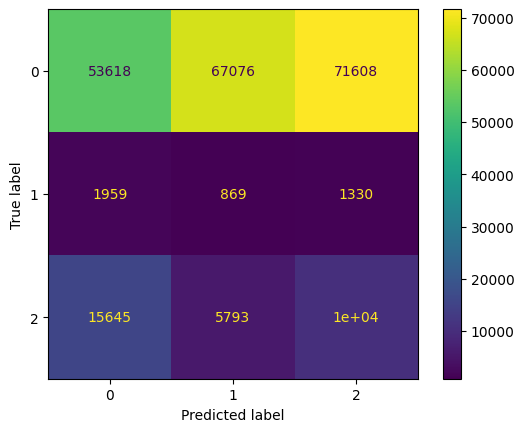

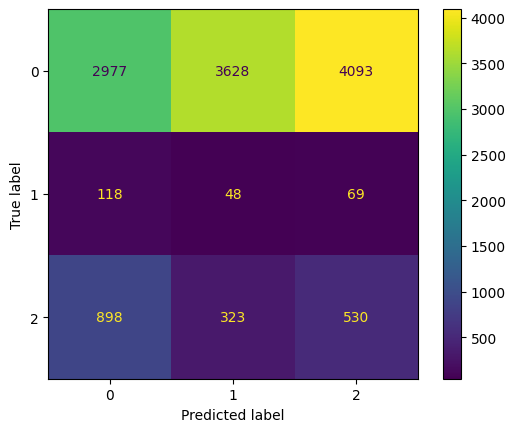

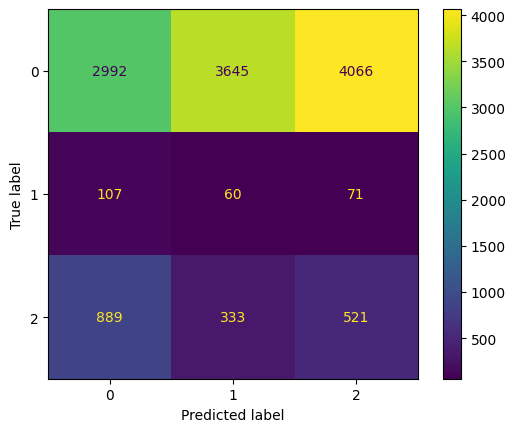

In [23]:
_, _, _, _, _, _ = metrics(svm_downsample, train_x, train_y, val_x, val_y, test_x, test_y)

/Users/alexacole/anaconda3/envs/CAI4104/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


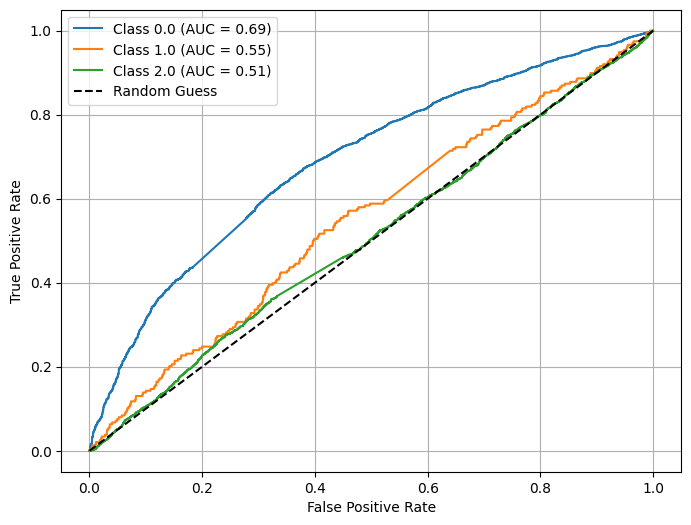

In [24]:
# plot roc curve for test
# Get unique classes for ROC curve
classes = np.unique(downsampled_train_y)
# Predict probabilities for each class
test_pred_prob_y = svm_downsample.predict_proba(test_x)

plot_multiclass_roc_curve(test_y, test_pred_prob_y, classes, 'SVM', 'ROC_CURVE_DOWNSAMPLE_SVM')

<Axes: ylabel='Feature'>

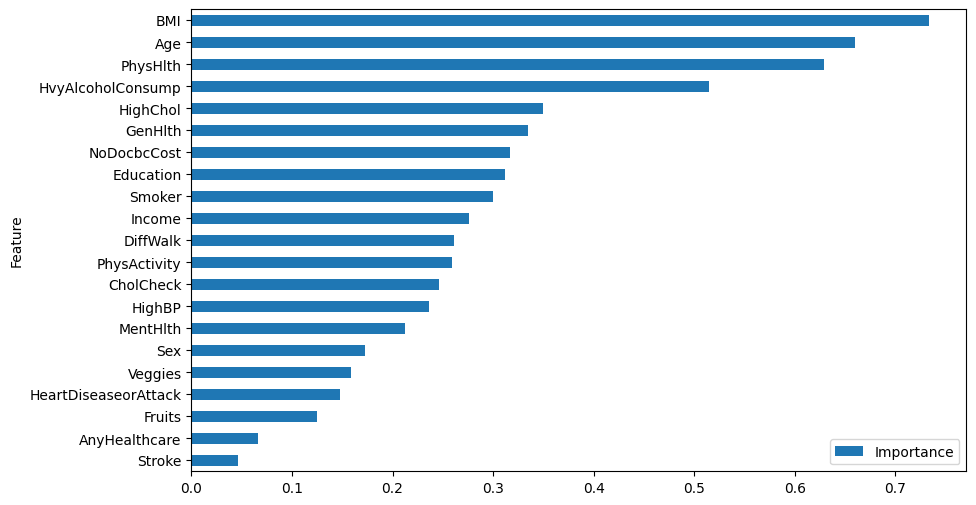

In [25]:
coefficients = svm_downsample.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

## Scaled Raw Data

In [26]:
svm = create_compile_svm(train_x, train_y, val_x, val_y)

Total time taken 5754.951251029968


Train Accuracy: 0.842, Val  Accuracy: 0.843, Test  Accuracy: 0.844
Train Recall: 0.333, Val  Recall: 0.333, Test  Recall: 0.333


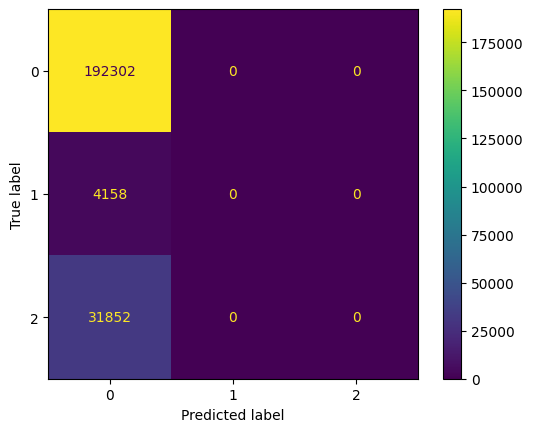

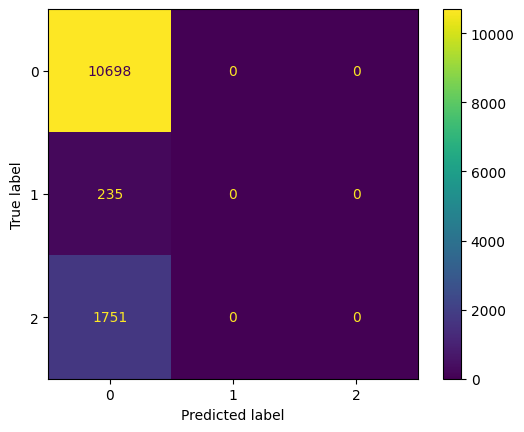

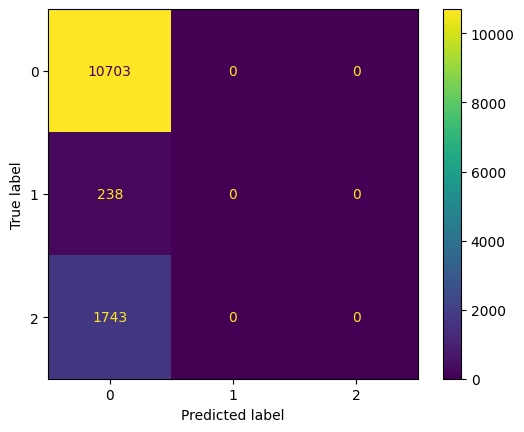

In [27]:
_, _, _, _, _, _ = metrics(svm, train_x, train_y, val_x, val_y, test_x, test_y)

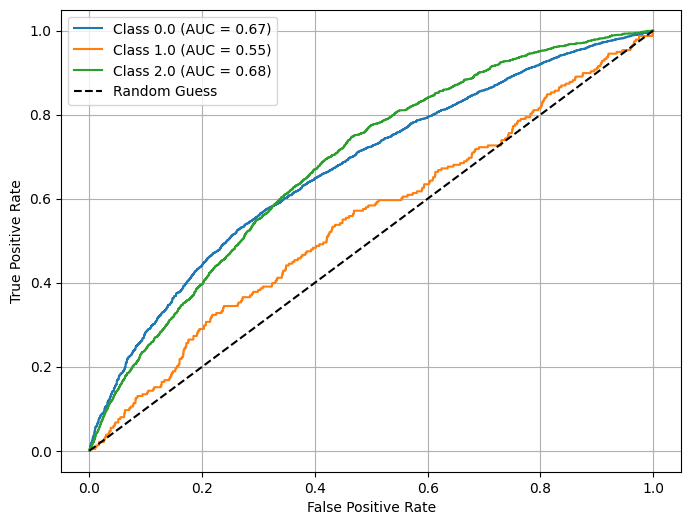

In [28]:
# plot roc curve for test
# Get unique classes for ROC curve
classes = np.unique(train_y)
# Predict probabilities for each class
test_pred_prob_y = svm.predict_proba(test_x)

plot_multiclass_roc_curve(test_y, test_pred_prob_y, classes, 'SVM', 'ROC_CURVE_SVM')

<Axes: ylabel='Feature'>

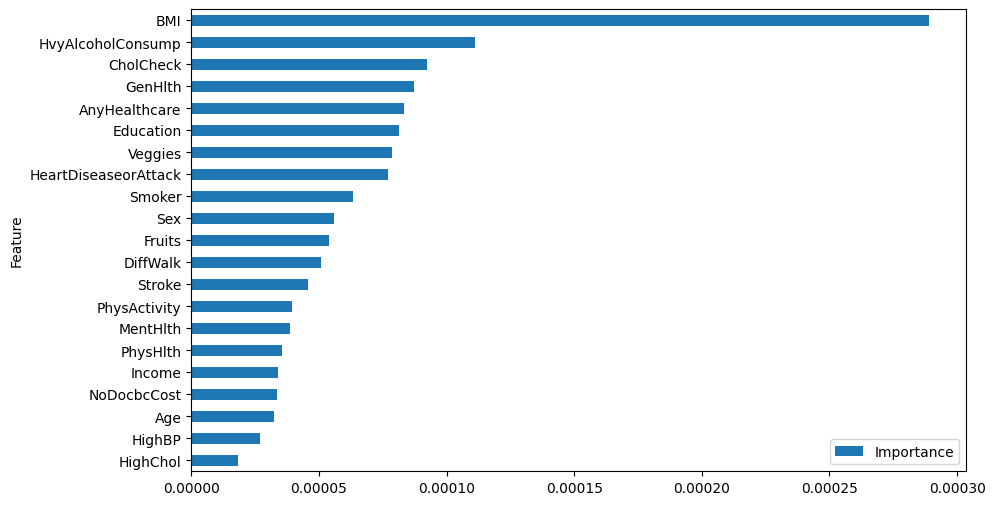

In [29]:
coefficients = svm.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

## Class Weights

In [30]:
begin_time = time.time()
svm_classes = SVC(kernel='linear',probability=True,random_state=seed,class_weight='balanced')
svm_classes.fit(train_x, train_y)
end_time = time.time()
print("Total time taken", end_time - begin_time)

Total time taken 18144.18593788147


Train Accuracy: 0.653, Val  Accuracy: 0.656, Test  Accuracy: 0.651
Train Recall: 0.513, Val  Recall: 0.504, Test  Recall: 0.512


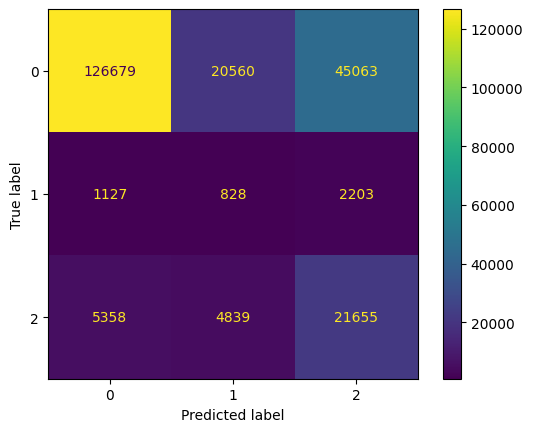

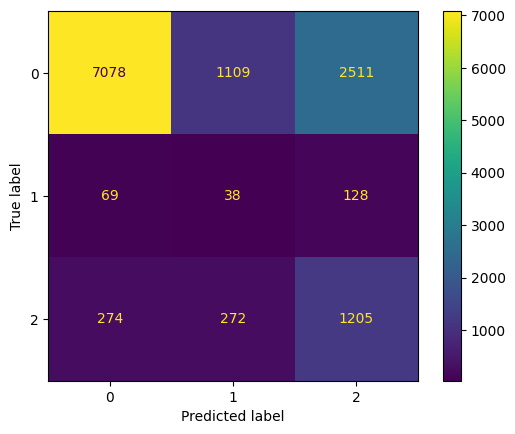

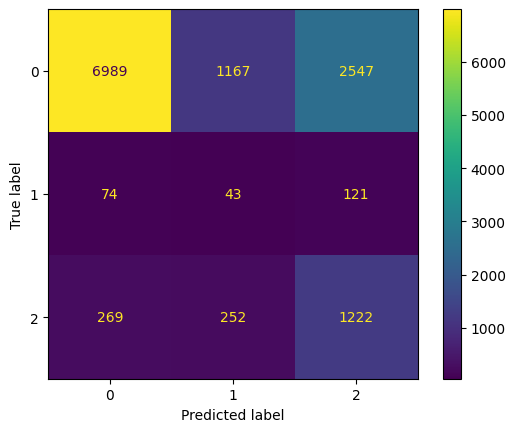

In [31]:
_, _, _, _, _, _ = metrics(svm_classes, train_x, train_y, val_x, val_y, test_x, test_y)

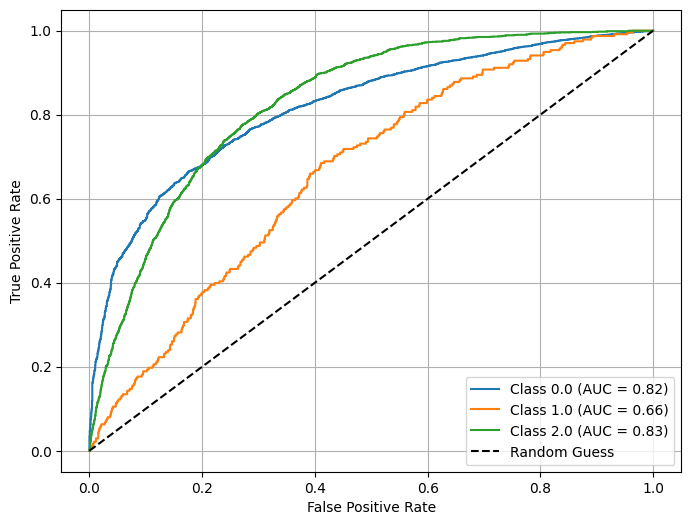

In [32]:
# plot roc curve for test
# Get unique classes for ROC curve
classes = np.unique(train_y)
# Predict probabilities for each class
test_pred_prob_y = svm_classes.predict_proba(test_x)

plot_multiclass_roc_curve(test_y, test_pred_prob_y, classes, 'SVM', 'ROC_CURVE_CLASS_WEIGHTS_SVM')

<Axes: ylabel='Feature'>

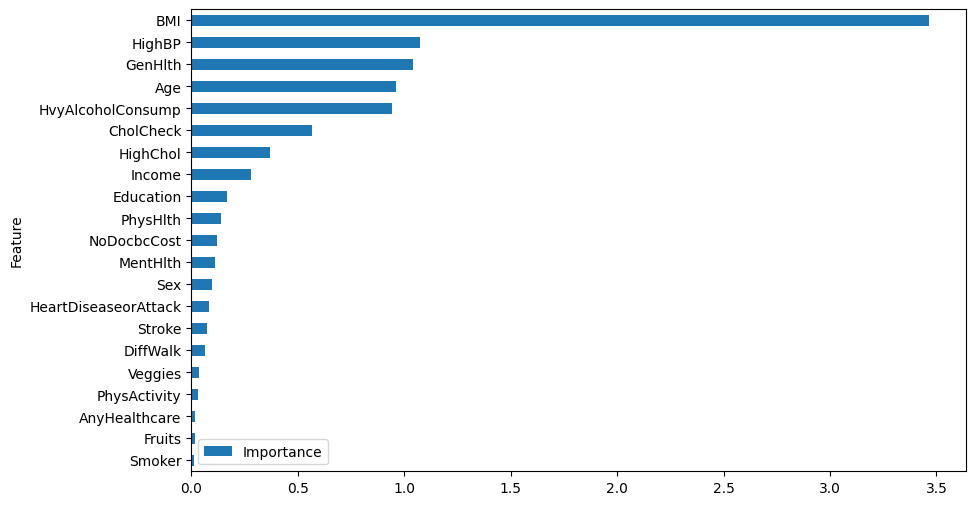

In [33]:
coefficients = svm_classes.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))